In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import glob
import os.path
import pandas as pd

# Creating a data analysis pipeline: chemiluminescence of bleach

It's common to have a set of data files that all need to be analyzed in the same manner. If you have two data sets, doing them by hand might be easy. At ten, it gets repetative. But by 100 or 1000 you need to find ways to automate as much of the analysis as possible. The process of analyzing a large number of similar datasets is called a data analysis pipeline. In this notebook, you'll learn some skills to help you begin to automate your own data analysis and create a pipline.

The sample dataset here is chemiluminesnce of bleach. Experimentally, solutions of bleach are combined with luminol and peroxide at varying concentrations. The resulting chemilumenesce is recorded over time. Each data set shows an initial fast rise due to the combination of the samples, then a slow decay. That decay trace can be analyzed to understand the kinetics of the reaction. The first step in the analysis is to fit each dataset to a decaying exponential and extract fit parameters.

This analysis is split into two files. The first one walks you through how to fit a single data file, in order to be ready to build your pipeline. You might want to review that one if you haven't worked through it yet. This is the second notebook, which talks you though how to turn the previous notebook into a pipeline that will rapidly analyze many data files.

Skills in this notebook:

Skills in the next notebook:


# Building a data analysis pipeline

Now that you've worked with a single data file, let's consider how we can approach many files. The first question is: just how much does it make sense to automate? We'll split it into two cases.

## Case 1: You have a handful of files **or** you're really unsure of your programming ability

You might want to do a kind of soft automation. The following steps were performed in the preceeding notebook:
 - [ ] Importing the first data set
 - [ ] Trimming the data
   - [ ] Finding the peaks
   - [ ] Slice both arrays after the last peak
 - [ ] Setting up the fit and finding the initial guess
   - [ ] Define the fit function
   - [ ] Pick reasonable initial guess parameters
 - [ ] Fitting the data and printing out the fit parameters

Our big worry here is reproducibility. You want to structure the rest of your file such that you don't end up mixing up what you've done and what you haven't. So here's our recipe for soft automation:

1. Create a markdown cell with a header for each file
2. In that markdown cell, copy the list of steps
3. For each file, work through the lists of steps, creating new code cells as needed. Check off the box when you've completed it.

Your code cells should be repetative: each file is going through the same set of steps. The markdown cell is key here: it's going to ensure that you've completed each step. It's also going to allow you to open up your file on another day and see where you left off.

The one thing that we need to add is a way to collect all the data, and then a nice way to display it when we're done. There are two cells below. The first shows you how to make Python lists and append numbers, which is how you'll handle each of your fit parameters. The second uses the `os.path` library to access the filename and store it in a list.



In [2]:
list_of_numbers = [] #initialize the list somewhere near the top of your notebook
list_of_numbers.append(1) #each time you get a fit parameter, you can append it to your list
list_of_numbers.append(1.23)
list_of_numbers.append(4700)
print(list_of_numbers)
# Of course you'll need one list for each fit parameter

[1, 1.23, 4700]


In [3]:
files = [] #initialize this list where you initialize the ones for fit parameters

#pick a file for analysis
filename = "bleach/A_CL_T2.csv"
#load the file to do your analysis
dataX_raw, dataY_raw = np.loadtxt(filename, skiprows = 21, usecols = (2,3), delimiter = ',', unpack = True)
#grab out the important part of the filename and append it to your list
files.append(os.path.basename(filename))

#continue with the rest of your analysis
#
#

# Appending a couple more filenames
filename = "bleach/A_CL_T1.csv"
files.append(os.path.basename(filename))
filename = "bleach/A_CL_T3.csv"
files.append(os.path.basename(filename))
print(files)

['A_CL_T2.csv', 'A_CL_T1.csv', 'A_CL_T3.csv']


After you've fit all your files, it'd be nice to display the filenames and fit parameters in a neat table. We can accomplish that by using a new library: Pandas. This library extends Numpy arrays to work with a wide variety of data types and shapes. The Pandas library has a lovely tutorial titled "10 minutes to pandas" that shows the basic functionality, located here: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

The cell below shows you how to take the two sample lists from above, assemble them into a dataframe, and display the results. Use this as an example to make a dataframe that contains your filenames and all three of your fit parameters for each file.

Your dataframe can also be used to access, plot, and manipulate your fit parameters.

In [4]:
df = pd.DataFrame({"File":files, "A":list_of_numbers})
df

,File,A
0,A_CL_T2.csv,1.00
1,A_CL_T1.csv,1.23
2,A_CL_T3.csv,4700.00


## Case 2: You have may files and want to automate the process

In the case where you have a large number of files, you want to try to automate the work as much as possible. So far, the user inputs have been: finding the index, setting the initial parameters, and manually typing in each step. There are a lot of options here.

Much of what we did in the previous notebook was structured to make this easier. For example, we found an algorithmic way to guess initial parameters. Now we need to learn how to grab out all of our files and repeat the analysis on the whole group. As we go, we should grab filenames and fit parameters in lists, so that we can make a pretty dataframe at the end.

Here's our list of steps:
 - [ ] Grab all the filenames
 - [ ] Make a loop to iterate over all filenames
 - [ ] Add in the steps from our soft automation
 - [ ] Plan for issues
 - [ ] Add in lists for fit parameters
 - [ ] Make a nice dataframe of the parameters

### Grab all the filenames

We're going to use two libraries: `os.path` (https://docs.python.org/3/library/os.path.html) and glob (https://docs.python.org/3/library/glob.html). `os.path` contains basic functions for handling directory structures and filenames. `glob` let's us find many files that fit a particular pattern for their names.

Your data should be in a folder within your current working directory. Hopefully it's also named in some consistant way. The wildcard character (`*`) can be use to to replace a string of text. `os.path.join('name_of_folder_here', "*.csv")` would create a path to all CSV files in the folder specified in the first argument. `glob.glob()` then finds all files that fit that path. Fill in the cell below to create a path to your datafiles, find them all with `glob.glob()`, and print the list of files.

In [ ]:
file_location = os.path.join(
files = glob.glob(
print(files)

### Make a loop to iterate over all filenames

 - [x] Grab all the filenames
 - [ ] Make a loop to iterate over all filenames
 - [ ] Add in the steps from our soft automation
 - [ ] Plan for issues
 - [ ] Add in lists for fit parameters
 - [ ] Make a nice dataframe of the parameters
 
 A `for` loop can be used to iterate over these filenames. Refer to this item in the Python Tutorial if you need to learn the syntax for a `for` loop: https://docs.python.org/3/tutorial/controlflow.html#for-statements
 
 Use the cell below to make a `for` loop over your list of files. Have your loop print each filename, to show you that you've got it working.

### Add in the steps from our soft automation

 - [x] Grab all the filenames
 - [x] Make a loop to iterate over all filenames
 - [ ] Add in the steps from our soft automation
 - [ ] Plan for issues
 - [ ] Add in lists for fit parameters
 - [ ] Make a nice dataframe of the parameters
 
 

In [5]:
def exponential(x, a, k, b):
    return a*np.exp(-k*x) + b

opening file bleach\A_CL_T1.csv
No peaks found for bleach\A_CL_T1.csv
opening file bleach\A_CL_T10.csv
opening file bleach\A_CL_T2.csv
opening file bleach\A_CL_T3.csv
No peaks found for bleach\A_CL_T3.csv
opening file bleach\A_CL_T4.csv
opening file bleach\A_CL_T5.csv
opening file bleach\A_CL_T6.csv
opening file bleach\A_CL_T7.csv
opening file bleach\A_CL_T8.csv
opening file bleach\A_CL_T9.csv


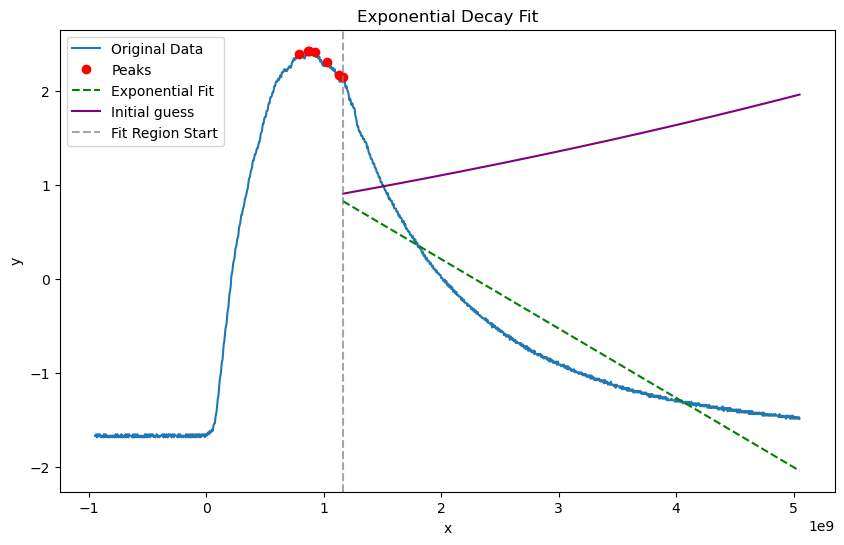

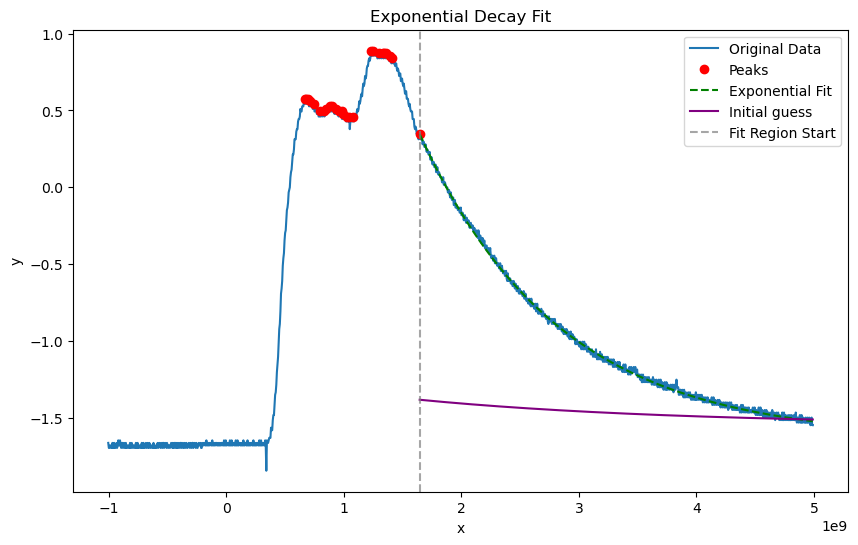

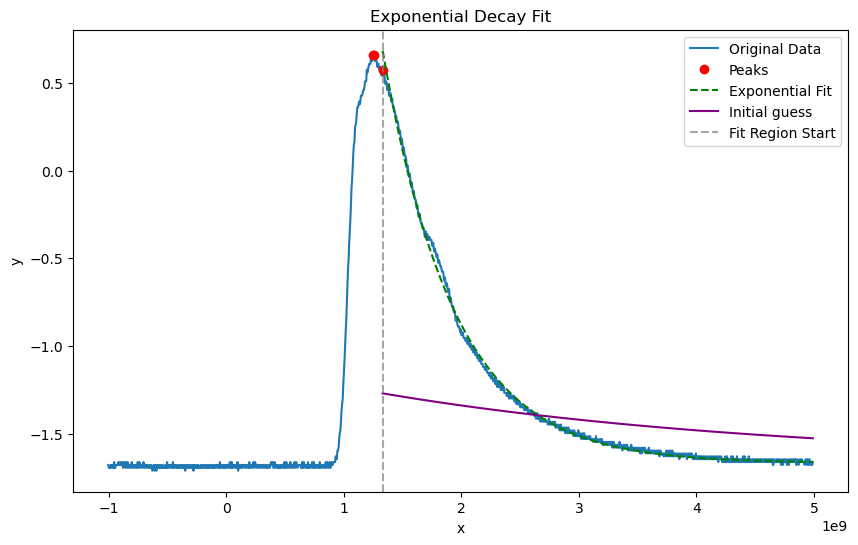

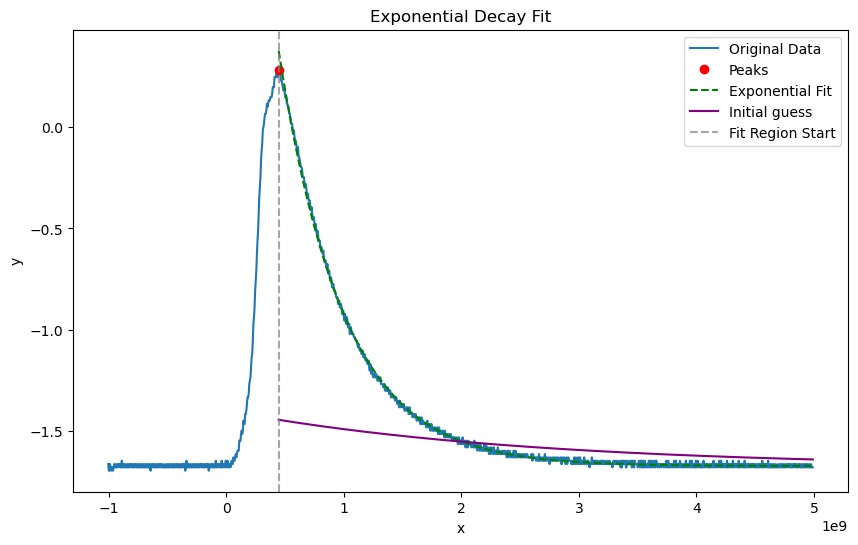

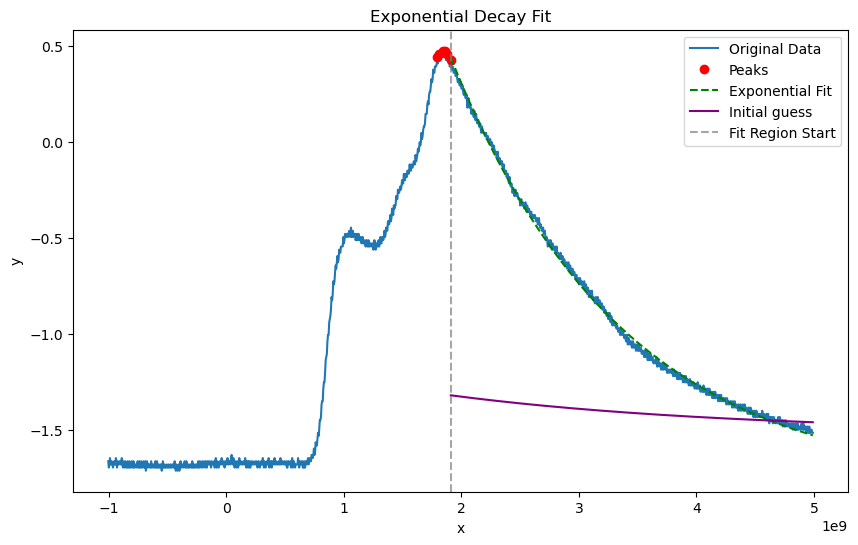

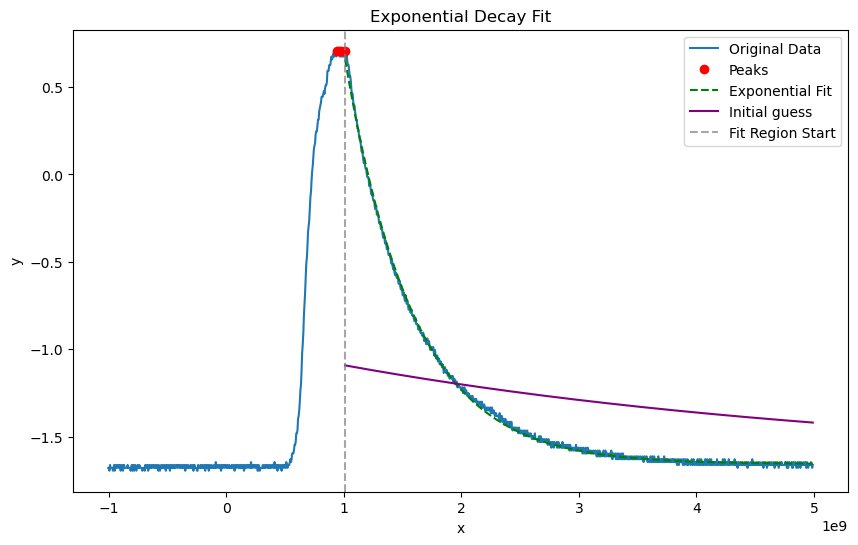

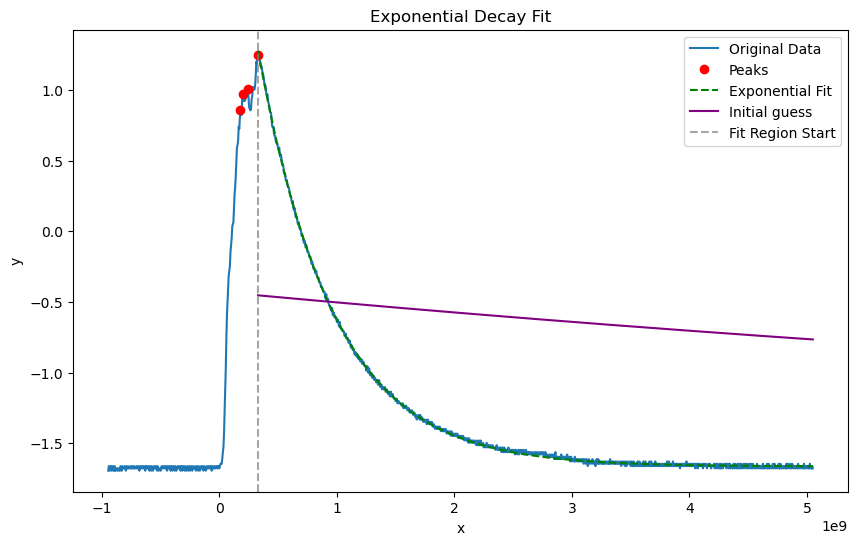

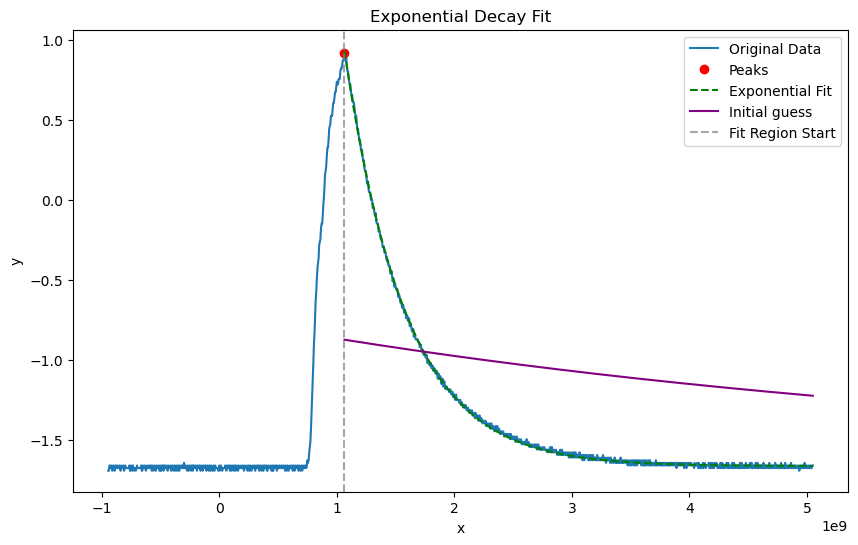

In [26]:
filelist = []
avalues = []
kvalues = []
bvalues = []

for file in files:
    print(f"opening file {file}")
    # open the file
    dataX_raw, dataY_raw = np.loadtxt(file, skiprows = 21, usecols = (2,3), delimiter = ',', unpack = True)

    # find peaks
    peaks, heights = find_peaks(dataY_raw, height = 0.25, prominence = .02)

    # get the peaks
    peakX = dataX_raw[peaks]
    peakY = dataY_raw[peaks]

    if len(peaks) > 0:
        last_peak_index = peaks[-1]
        #print(last_peak_index)
        last_peak_x = dataX_raw[last_peak_index]    
        last_peak_y = dataY_raw[last_peak_index]
        

        dataX = dataX_raw[last_peak_index:]  # x values after the last peak
        dataY = dataY_raw[last_peak_index:]  # y values after the last peak
        
        # Get guess for exponential fit
        A_guess = peakY[-1]  # Height of the last peak
        k_guess = np.log(abs(dataY[-1]/peakY[-1])) / (dataX[-1] - peakX[-1]) 
        B_guess = dataY[-1]  # Approximation of the asymptote
        initial_guesses = [A_guess, k_guess, B_guess]
        
        # Fit the data
        #popt, pcov = curve_fit(exponential, dataX, dataY, p0=initial_guesses)
        popt, pcov = curve_fit(exponential, dataX, dataY, p0 = initial_guesses, maxfev = 8000)
        # Extract fitted parameters
        A_fit, k_fit, B_fit = popt

        # Plot original data, peak, and the fit
        plt.figure(figsize=(10, 6))
        plt.plot(dataX_raw, dataY_raw, label="Original Data")
        plt.plot(peakX, peakY, 'ro', label="Peaks")
        plt.plot(dataX, exponential(dataX, *popt), 'g--', label="Exponential Fit")
        plt.plot(dataX, exponential(dataX, *initial_guesses), 'purple', label = "Initial guess")
        plt.axvline(x=last_peak_x, color='gray', linestyle='--', alpha=0.7, label="Fit Region Start")   
        plt.title("Exponential Decay Fit")
        plt.xlabel("x")
        plt.ylabel("y") 
        plt.legend()
        
        filelist.append(os.path.basename(file))
        avalues.append(popt[0])
        bvalues.append(popt[2])
        kvalues.append(popt[1])
    else:
        # we might need to do these "by hand"
        print(f"No peaks found for {file}")


    



In [15]:
ier

NameError: name 'ier' is not defined

In [17]:
df = pd.DataFrame({"File":filelist, "A":avalues, "k":kvalues, "B":bvalues})
df.head()

,File,A,k,B
0,A_CL_T10.csv,-34270.711737,-2.155357e-14,34272.397962
1,A_CL_T2.csv,7.952871,8.432936e-10,-1.640166
2,A_CL_T4.csv,20.668217,1.634132e-09,-1.667107
3,A_CL_T5.csv,4.595491,1.814459e-09,-1.672542
4,A_CL_T6.csv,8.258069,6.827941e-10,-1.800828
